# Scraping domain content

In [116]:
import requests
from bs4 import BeautifulSoup
import os
import re 

#Elements to scrape content
chemical_elements = ['Zirconium','Hafnium','Technetium','Lithium','Beryllium','Magnesium','Potassium','Calcium',
                     'Tantalumh','Tungsten','Nickel','Oxygen','Copper','Aluminium','Zinc','Cobalt',
                     'Iron','Silver','Rhodium','Uranium']

url_prefix = "https://en.wikipedia.org/wiki/"
output= []
for element in chemical_elements:
    url = url_prefix + element
    resp = requests.get(url)
    element_soup = BeautifulSoup(resp.text, 'html.parser')
    #Create new file to store output
    with open (os.getcwd() + "\\Chemical Elements\\" + element+".txt", 'x', encoding="utf-8") as f:
        for i in element_soup.find_all('p'):
            #Replace reference and write to file
            filt_text = re.sub(r'[\[].*?[\]]', '', i.text)
            f.write(filt_text + " ")
        f.close()

# Tokenization

In [121]:
import nltk
from nltk.stem import PorterStemmer
import os

chemical_elements = ['Zirconium','Hafnium','Technetium','Lithium','Beryllium','Magnesium','Potassium','Calcium',
                     'Tantalumh','Tungsten','Nickel','Oxygen','Copper','Aluminium','Zinc','Cobalt',
                     'Iron','Silver','Rhodium','Uranium']

data = []

for element in chemical_elements:
    with open(os.getcwd() + "\\Chemical Elements\\" + element+".txt", 'r', encoding="utf-8") as f:
        text =  f.read().encode('utf-8')
    
        filt_text = text.decode("utf-8").replace('\n','')
        data.append({'element': element, 'text':filt_text})
    f.close()

tokens_data_before_stem = {}
len_dist_before_stem = {}

for i in data:
    tokens = set(nltk.word_tokenize(i['text']))
    for t in tokens:
        if(t not in tokens_data_before_stem.keys()):
            tokens_data_before_stem[t] = len(t)
            
        if(len(t) not in len_dist_before_stem.keys()):
            len_dist_before_stem[len(t)] = [t]
        else:
            len_dist_before_stem[len(t)].append(t)
                

import pandas as pd
tokens_data_before_stem_df = pd.DataFrame(tokens_data_before_stem.items(), columns=['Token', 'Length'])
len_dist_before_stem_df = pd.DataFrame(len_dist_before_stem.items(), columns=['Length', 'Tokens'])
tokens_data_before_stem_df
#len_dist_before_stem_df

,Token,Length
0,isobutyl,8
1,conditions,10
2,minerals,8
3,commonly,8
4,"22,700",6
...,...,...
13385,UO,2
13386,neptunium-239,13
13387,OECD,4
13388,pyrophoricity,13


<module 'matplotlib.pyplot' from 'c:\\users\\jerms\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

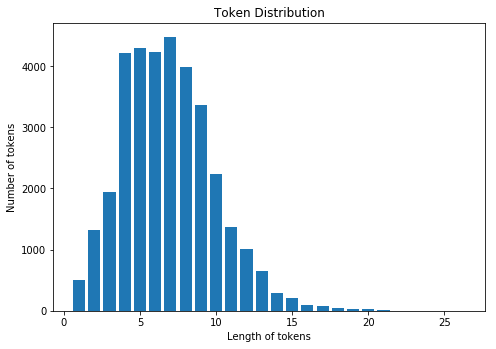

In [118]:
import matplotlib.pyplot as plt

tokens_x = list(len_dist_before_stem.keys())
tokens_y = list()

for k,v in len_dist_before_stem.items():
    tokens_y.append(len(v))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(tokens_x, tokens_y)
ax.set_ylabel('Number of tokens')
ax.set_xlabel('Length of tokens')
ax.set_title('Token Distribution')
plt

In [135]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()

tokens_data_after_stem = {}
len_dist_after_stem = {}

for token in tokens_data_before_stem.keys():
    stem = ps.stem(token)
    if(stem not in tokens_data_after_stem.keys()):
        tokens_data_after_stem[stem] = len(stem)
    if(len(stem) not in len_dist_after_stem.keys()):
        len_dist_after_stem[len(stem)] = [stem]
    else:
        len_dist_after_stem[len(stem)].append(stem)

tokens_data_after_stem_df = pd.DataFrame(tokens_data_after_stem.items(), columns=['Token', 'Length'])
len_dist_after_stem_df = pd.DataFrame(len_dist_after_stem.items(), columns=['Length', 'Tokens'])

#tokens_data_after_stem_df
len_dist_after_stem_df



,Length,Tokens
0,8,"[isobutyl, commonli, shortest, injector, radio..."
1,6,"[condit, 22,700, fabric, requir, direct, effic..."
2,5,"[miner, stick, solut, south, anton, phase, age..."
3,4,"[235u, 3.09, evid, fast, 1970, give, coat, bom..."
4,7,"[product, respect, convert, regener, monomer, ..."
5,3,"[cut, all, 360, pwr, e.g, 100, vam, for, now, ..."
6,2,"['', wa, Hf, +4, C., CO, up, 60, 40, ga, It, t..."
7,10,"[carcinogen, laboratori, throughout, decomposi..."
8,12,"[hyperkalemia, relationship, tetraalkoxid, rea..."
9,11,"[sorbent-bas, zircon-bear, antiperspir, develo..."


<module 'matplotlib.pyplot' from 'c:\\users\\jerms\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

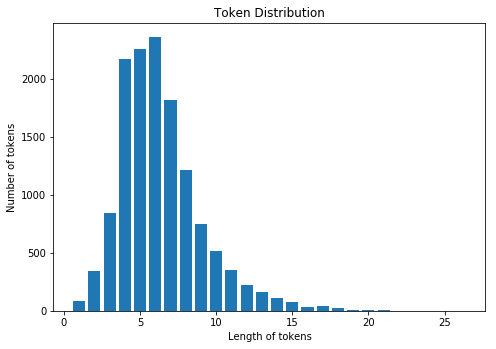

In [136]:
tokens_x_aft_stem = list(len_dist_after_stem.keys())
tokens_y_aft_stem = list()

for k,v in len_dist_after_stem.items():
    tokens_y.append(len(v))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(tokens_x_aft_stem, tokens_y_aft_stem)
ax.set_ylabel('Number of tokens')
ax.set_xlabel('Length of tokens')
ax.set_title('Token Distribution (After Stemming)')
plt

In [150]:
from nltk.tokenize import sent_tokenize
from collections import Counter

#Sentence segmentation
sentences = list()
for i in data:
    sentences.extend(sent_tokenize(i['text']))


sentences_len_dist = []
for s in sentences:
    sentence_token = nltk.word_tokenize(s)
    sentences_len_dist.append(len(sentence_token))

sentences_len_dist = Counter(sentences_len_dist)

<module 'matplotlib.pyplot' from 'c:\\users\\jerms\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

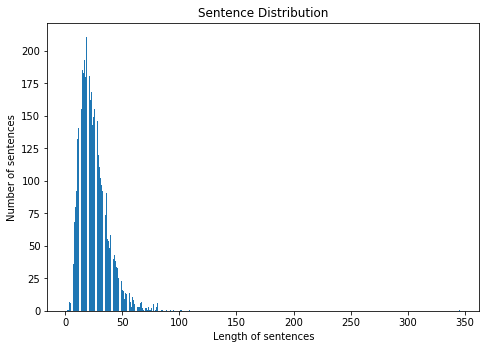

In [151]:
# plot distribution of number of sentences of each length against length of sentences
sentences_y = list(sentences_len_dist.values())
sentences_x = list(sentences_len_dist.keys())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sentences_x, sentences_y)
ax.set_ylabel('Number of sentences')
ax.set_xlabel('Length of sentences')
ax.set_title('Sentence Distribution')
plt